Linear Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
Offense = pd.read_csv('Offense/clean_offense.csv')
Offense = Offense.replace(np.nan, 0)
Offense.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted,Round,Draft_Outcome
0,1,2000,Bashir Yamini,WR,0.0,Iowa,College Stats,75,191,4.53,33.0,0.0,130.0,7.09,4.18,0,8,undrafted
1,2,2000,Spergon Wynn,QB,2.0,Texas State,College Stats,75,229,4.91,34.0,0.0,108.0,7.71,4.59,Cleveland Browns,6,drafted
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,36.0,0.0,123.0,7.22,4.16,Seattle Seahawks,6,drafted
3,4,2000,Bobbie Williams,OT,64.0,Arkansas,0,76,332,5.26,29.0,28.0,97.0,7.78,4.72,Philadelphia Eagles,2,drafted
4,5,2000,Michael Wiley,RB,4.0,Ohio State,College Stats,71,193,4.50,0.0,0.0,0.0,0.00,0.00,Dallas Cowboys,5,drafted


In [5]:
stats = pd.read_csv('College Stats2.csv')
stats.rename(columns={'Player Name': 'Player', 'Position': 'Pos'}, inplace=True)
stats.head()

,Player_Code,Player,Pos,Game Played,Pass Att,Pass Comp,Pass Yard,Pass Int,Pass TD,Rush Att,Rush Yard,Rush TD,Rec,Rec Yards,Rec TD,Tackle Solo,Int Ret,Sack
0,87046.0,Abanikanda,0,45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,2.0,7.5
1,1044292.0,Ademola Olatunji,DB,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0
2,84751.0,Allen,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,0.0,0.0,0.0,0.0
3,85056.0,Anthony,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,87303.0,Antolick,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
merged = pd.merge(Offense, stats, how='inner', on=['Player', 'Pos'])
merged.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,...,Pass TD,Rush Att,Rush Yard,Rush TD,Rec,Rec Yards,Rec TD,Tackle Solo,Int Ret,Sack
0,5,2001,Marcus Williams,WR,0.0,Washington State,College Stats,77,230,4.56,...,0.0,0.0,0.0,0.0,9.0,81.0,0.0,0.0,0.0,0.0
1,23,2001,Steve Smith,WR,139.0,Utah,College Stats,69,184,4.41,...,0.0,2.0,11.0,0.0,131.0,2040.0,14.0,0.0,0.0,0.0
2,24,2007,Steve Smith,WR,24.0,Southern California,College Stats,73,197,4.44,...,0.0,2.0,11.0,0.0,131.0,2040.0,14.0,0.0,0.0,0.0
3,72,2001,James Jackson,RB,9.0,Miami (FL),College Stats,70,210,4.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,0.0
4,114,2001,David Allen,RB,1.0,Kansas State,College Stats,69,194,4.62,...,0.0,2.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
QB2 = merged[merged['Pos'] == "QB"]
QB2.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,...,Pass TD,Rush Att,Rush Yard,Rush TD,Rec,Rec Yards,Rec TD,Tackle Solo,Int Ret,Sack
15,41,2004,Josh Harris,QB,0.0,Bowling Green,College Stats,73,238,4.78,...,0.0,6.0,-6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,1,2006,Vince Young,QB,36.0,Texas,College Stats,77,229,4.48,...,26.0,155.0,1050.0,12.0,0.0,0.0,0.0,1.0,0.0,0.0
41,8,2006,Charlie Whitehurst,QB,7.0,Clemson,College Stats,77,223,4.75,...,11.0,50.0,26.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
45,15,2006,Marcus Vick,QB,0.0,Virginia Tech,College Stats,73,200,4.47,...,17.0,147.0,380.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
57,43,2006,Omar Jacobs,QB,0.0,Bowling Green,College Stats,76,232,4.84,...,26.0,40.0,62.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
QB2.to_csv("QB2.csv", index=False, header=True)

In [ ]:
merge_1 = test1.merge(test2, left_on = ['id_A', 'id_B'], right_on= ['id_a', 'id_b'])
merge_2 = test1.merge(test2, left_on = ['id_A', 'id_B'], right_on= ['id_b', 'id_a'])
final_df = pd.concat([merge_1, merge_2]).drop_duplicates()

In [17]:
combinedOffstats = pd.merge(Offense, stats, on=["Player"])
combinedOffstats.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,...,Pass TD,Rush Att,Rush Yard,Rush TD,Rec,Rec Yards,Rec TD,Tackle Solo,Int Ret,Sack
0,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,...,0,0,0,0,3,41,0,0,0,0.0
1,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,...,0,0,0,0,0,0,0,0,0,0.0
2,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,...,0,0,0,0,0,0,0,1,0,0.0
3,14,2000,Travis Taylor,WR,36.0,Florida,College Stats,73,199,4.43,...,0,0,0,0,0,0,0,4,0,0.0
4,21,2000,Paul Smith,FB,3.0,Texas-El Paso,0,71,220,4.65,...,82,317,665,27,0,0,0,2,0,0.0


In [ ]:
merge_1 = test1.merge(test2, left_on = ['id_A', 'id_B'], right_on= ['id_a', 'id_b'])
merge_2 = test1.merge(test2, left_on = ['id_A', 'id_B'], right_on= ['id_b', 'id_a'])
final_df = pd.concat([merge_1, merge_2]).drop_duplicates()

In [19]:
combinedOffstats2 = combinedOffstats.drop_duplicates(subset=['Player'], keep='first')
combinedOffstats2.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,...,Pass TD,Rush Att,Rush Yard,Rush TD,Rec,Rec Yards,Rec TD,Tackle Solo,Int Ret,Sack
0,3,2000,James Williams,WR,4.0,Marshall,College Stats,71,180,4.59,...,0,0,0,0,3,41,0,0,0,0.0
3,14,2000,Travis Taylor,WR,36.0,Florida,College Stats,73,199,4.43,...,0,0,0,0,0,0,0,4,0,0.0
4,21,2000,Paul Smith,FB,3.0,Texas-El Paso,0,71,220,4.65,...,82,317,665,27,0,0,0,2,0,0.0
6,50,2000,Jamal Lewis,RB,83.0,Tennessee,College Stats,73,240,4.58,...,0,0,0,0,0,0,0,101,4,2.5
9,59,2000,John Jones,TE,0.0,Indiana (PA),College Stats,76,248,4.63,...,0,0,0,0,0,0,0,0,0,0.0


In [20]:
QB = combinedOffstats2[combinedOffstats2['Pos'] == "QB"]
QB.head()

,Rk,Year,Player,Pos,AV,School,College,Height,Wt,40YD,...,Pass TD,Rush Att,Rush Yard,Rush TD,Rec,Rec Yards,Rec TD,Tackle Solo,Int Ret,Sack
11,60,2000,Doug Johnson,QB,8.0,Florida,College Stats,74,226,4.95,...,0,9,-2,0,2,27,0,5,0,2.0
12,97,2000,Travis Brown,QB,1.0,Northern Arizona,0,75,218,5.01,...,0,37,266,2,171,2093,12,2,0,0.0
55,126,2001,David Rivers,QB,0.0,Western Carolina,0,75,223,4.73,...,0,0,0,0,0,0,0,4,0,0.0
104,139,2001,Justin Coleman,QB,0.0,Nebraska-Kearney,0,76,238,5.22,...,0,0,0,0,0,0,0,1,0,0.0
140,160,2002,David Neill,QB,0.0,Nevada,College Stats,75,206,4.95,...,0,0,0,0,0,0,0,2,0,1.0


In [21]:
combinedOffstats2.to_csv("combinedOffstats2.csv", index=False, header=True)

In [8]:
X = Offense[["Height", "Wt", "40YD", "Vertical", "BenchReps", "Broad Jump", "3Cone", "Shuttle"]]
y = Offense["Round"].values.reshape(-1, 1)
print(X.shape, y.shape)

(2910, 8) (2910, 1)


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [67]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [68]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.03064112369193961
Testing Score: -0.005330298437336012


Text(0.5, 1.0, 'Residual Plot')

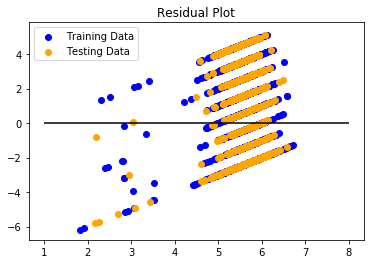

In [69]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

Quantifying Regression

In [70]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()

In [72]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 6.1975785082999675
R-squared (R2 ): 0.022787858175791986


In [74]:
model.score(X, y)

0.022787858175791986

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [76]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
model.score(X_test, y_test)

-0.005330298437336012

Logical Regression


In [86]:
XOffense = Offense.drop(columns=["Rk","Year","Player","Pos","AV","School","College","Drafted", "Round", "Draft_Outcome"])

In [87]:
X = XOffense
y = Offense["Round"]
print(X.shape, y.shape)

(2910, 8) (2910,)


In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [89]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [90]:
classifier.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.3913840513290559
Testing Data Score: 0.39697802197802196


In [94]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [8 8 8 8 8 8 8 8 8 8]
First 10 Actual labels: [8, 4, 2, 4, 2, 8, 8, 8, 8, 7]


In [95]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,8,8
1,8,4
2,8,2
3,8,4
4,8,2
5,8,8
6,8,8
7,8,8
8,8,8
9,8,7
